<a href="https://colab.research.google.com/github/ranjeev3000/Data-Analysis-of-Kwalee-Daatset/blob/main/kwalee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Name:** Ranjeev Kumar 

**Assignment:** Kwalee Pre-screening Data Analyst Interview Task

**Dataset:** level_progress.csv


# Importing the libraries in Python

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Reading the dataset level_progress for analysis

In [ ]:
df = pd.read_csv('level_progress.csv',error_bad_lines=False)

b'Skipping line 20518: expected 5 fields, saw 9\nSkipping line 51291: expected 5 fields, saw 9\n'


In [ ]:
df.head()

,event_datetime,player_id,level_number,status,session_id
0,2020-11-28 21:00:24.958000,00020eac3d7e4f058b87eac1a9a85c25,6,complete,6ddf006b807e451eb4706d6d98a049b6
1,2020-11-27 22:03:03.048000,00020eac3d7e4f058b87eac1a9a85c25,2,start,3ba98db705f2aa0bc406441a61c23b3c
2,2020-11-26 14:53:09.344000,002188c0bc476f356f4c3b74e5cc66c8,1,start,25cf292a8f1d3da01df8371276502edf
3,2020-12-03 11:43:26.582000,00576ef3617e6bbbabfa0b1090e4122d,1,start,21fd6a7db53a9220574563ac8a8c8b58
4,2020-12-04 14:23:07.448000,00576ef3617e6bbbabfa0b1090e4122d,7,start,358b9ab5c1c0f08bc7def310411eb90f


From Below analysis, we can check the total number of parameters in different features:
* event_datetime    91137
* player_id         91136
* level_number      91135
* status            91135
* session_id        91133



In [ ]:
df.count()

event_datetime    91137
player_id         91136
level_number      91135
status            91135
session_id        91133
dtype: int64

In [ ]:
df.describe()

,event_datetime,player_id,level_number,status,session_id
count,91137,91136,91135,91135,91133
unique,55827,3874,51,4,12759
top,2020-11-25 23:09:54.552000,006c4c66f9976d96fb0bf9852b214b30,1,start,7c354840caa7e3790cfcd7a4d8e97281
freq,2,398,11632,50730,164


**We can check that there are very few null values in the entire dataset. So, removing these null values from the DataFrame won't affect the result. Thus we are cleaning the data by removing the unwanted values.**

In [ ]:
df['status'].unique()

array(['complete', 'start', 'fail', '1721e5624b47b0985b9c8b0a15bab74f',
       nan], dtype=object)

In [ ]:
df.isna().sum()

event_datetime    0
player_id         1
level_number      2
status            2
session_id        4
dtype: int64

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91133 entries, 0 to 91136
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_datetime  91133 non-null  object
 1   player_id       91133 non-null  object
 2   level_number    91133 non-null  object
 3   status          91133 non-null  object
 4   session_id      91133 non-null  object
dtypes: object(5)
memory usage: 4.2+ MB


In [ ]:
df['event_datetime']=pd.to_datetime(df['event_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91133 entries, 0 to 91136
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_datetime  91133 non-null  datetime64[ns]
 1   player_id       91133 non-null  object        
 2   level_number    91133 non-null  object        
 3   status          91133 non-null  object        
 4   session_id      91133 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 4.2+ MB


**We are further converting the Dtype of level_number from object to int value as it will not cause any problem while visualizing through the graphs.**

In [ ]:
df['level_number']=df['level_number'].astype(int)

In [ ]:
df["day"] = df['event_datetime'].map(lambda x: x.day)
df["month"] = df['event_datetime'].map(lambda x: x.month)
df["year"] = df['event_datetime'].map(lambda x: x.year)

# Removing the unwanted columns from the DataFrame

In [ ]:
df.drop(['player_id','session_id','event_datetime'],inplace= True,axis=1)

In [ ]:
df.head()


,level_number,status,day,month,year
0,6,complete,28,11,2020
1,2,start,27,11,2020
2,1,start,26,11,2020
3,1,start,3,12,2020
4,7,start,4,12,2020


On the very first analysis through the DataFrame, we can find that most of the **fail status** level lies in the range of 0-32

There are some outliers, also available and the maximum value of failed level is 49.

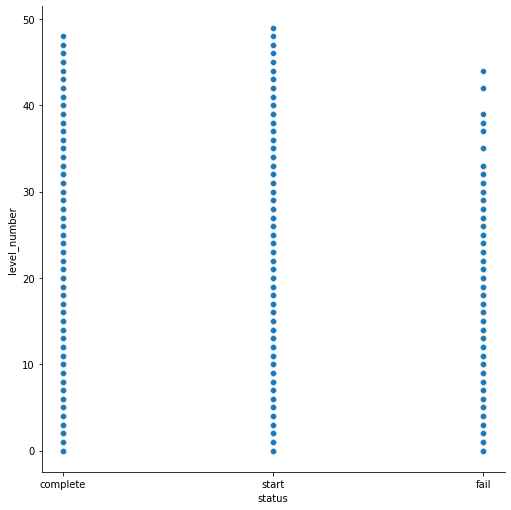

In [ ]:
sns.relplot(x='status',y='level_number',data=df,height=7,aspect=1)

I have further processed in depth analysis by classifying data on the day parameter.
* Day 26 and Day 27 has most of the outliers available. So, it is higher chance that most of the people will even fail on this day of the month based on the historical data.
* Day 10- Day 16 has minimum number of failed levels. So, Players wers more focussed on this day of the month.
* Apart from above relation, patterns in most of the days of failed levels were similar.

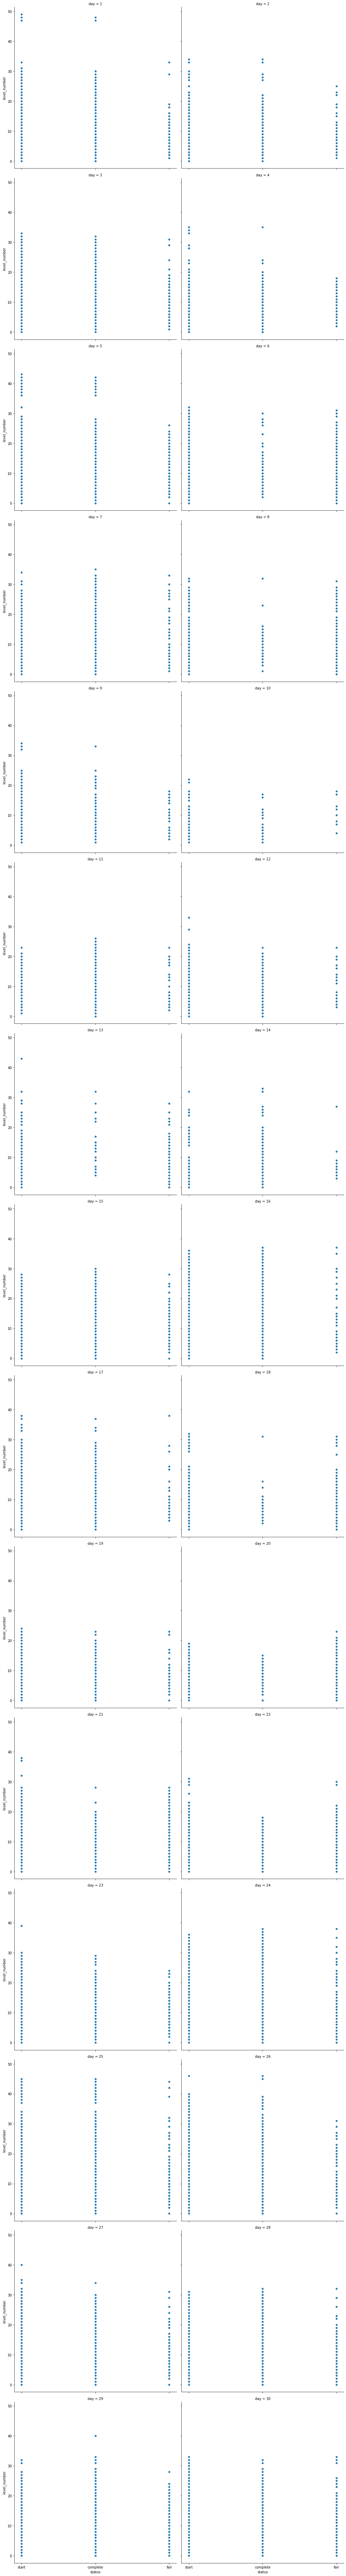

In [ ]:
sns.relplot(x='status',y='level_number',data=df,height=7,aspect=1,col='day',col_wrap=2)

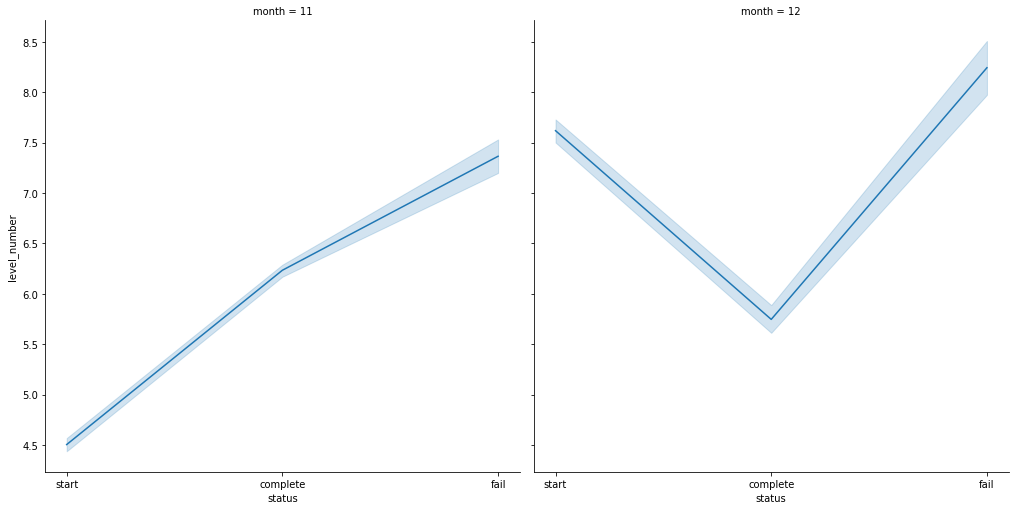

In [ ]:
sns.relplot(x='status',y='level_number',data=df,height=7,aspect=1,kind="line",col='month')

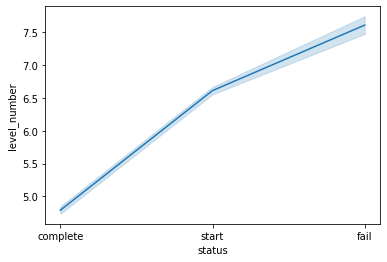

In [ ]:
  sns.lineplot(x='status',y='level_number',data=df)

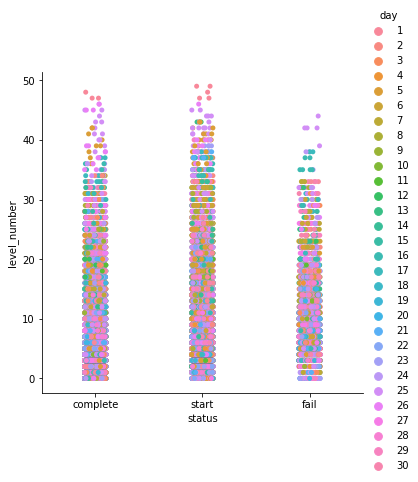

In [ ]:
sns.catplot(x='status',y='level_number',data=df,hue='day')

On further classifying the data on the basis of **month** pattern, we can say that:
* Most People failed at higher level in the 11th month of the year.
* Failed dataplots are more located in between the range of levels 0-35.


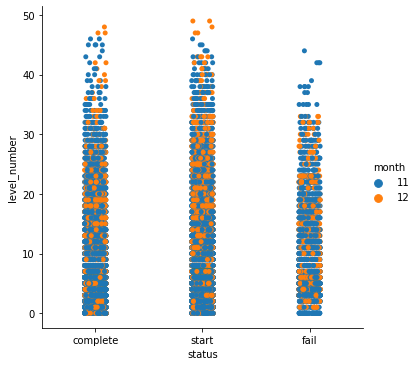

In [ ]:
sns.catplot(x='status',y='level_number',data=df,hue='month')

I have further used the boxplot to get the following information:
* Most of the players failed in the 11th month of the year as compared to the 12th month.
* The average value of 12th month is even higher than the 11th month which lies in between the range 3-8 levels.


**So, on an average most of the players failed in between 3-8 levels. While, there are few players who have failed at hiher level in the 11th month of the year.**

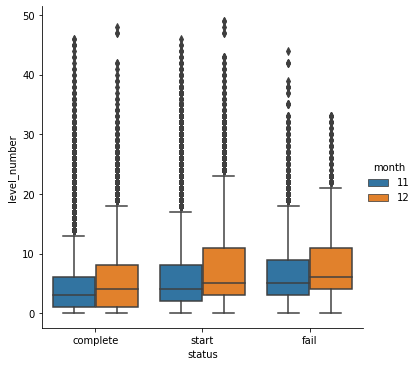

In [ ]:
sns.catplot(x='status',y='level_number',data=df,hue='month',kind='box')

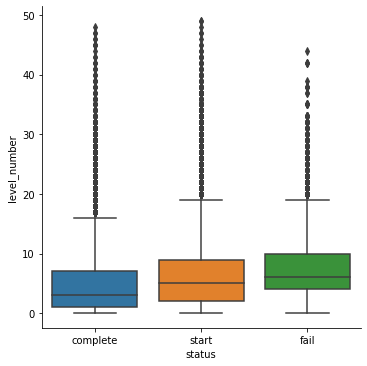

In [ ]:
sns.catplot(x='status',y='level_number',data=df,kind='box')

Further below code is to find the maximum value of the failed level values. So, the maximum value on which any player was failed is **level 49**.

In [ ]:
b = df[df['status']=="fail"]

In [ ]:
b.describe()

In [ ]:
b.count()

In [ ]:
df['status']

In [ ]:
b.max()

49